# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [32]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

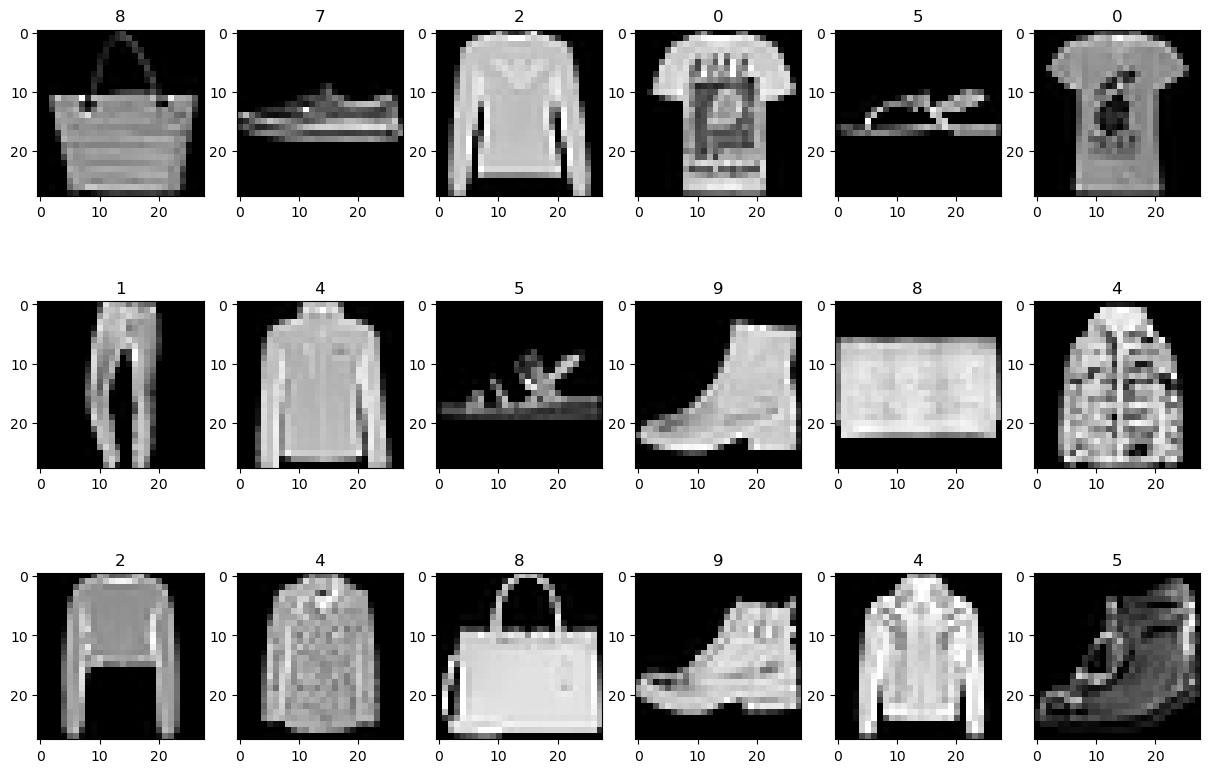

In [34]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [35]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [29]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [30]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 56s 59ms/step - loss: 0.5076 - accuracy: 0.8221 - val_loss: 0.3244 - val_accuracy: 0.8835
Epoch 2/50
938/938 [==============================] - 60s 64ms/step - loss: 0.2681 - accuracy: 0.9043 - val_loss: 0.2969 - val_accuracy: 0.8927
Epoch 3/50
938/938 [==============================] - 60s 64ms/step - loss: 0.2249 - accuracy: 0.9179 - val_loss: 0.3030 - val_accuracy: 0.8928
Epoch 4/50
938/938 [==============================] - 64s 68ms/step - loss: 0.1890 - accuracy: 0.9327 - val_loss: 0.3070 - val_accuracy: 0.8987
Epoch 5/50
938/938 [==============================] - 59s 63ms/step - loss: 0.1701 - accuracy: 0.9378 - val_loss: 0.3150 - val_accuracy: 0.8989
Epoch 6/50
938/938 [==============================] - 61s 65ms/step - loss: 0.1514 - accuracy: 0.9454 - val_loss: 0.3122 - val_accuracy: 0.9006
Epoch 7/50
938/938 [==============================] - 59s 63ms/step - loss: 0.1344 - accuracy: 0.9509 - val_loss: 0.3302 - val_accuracy:

Train Acc      0.9958833456039429
Validation Acc 0.8817999958992004


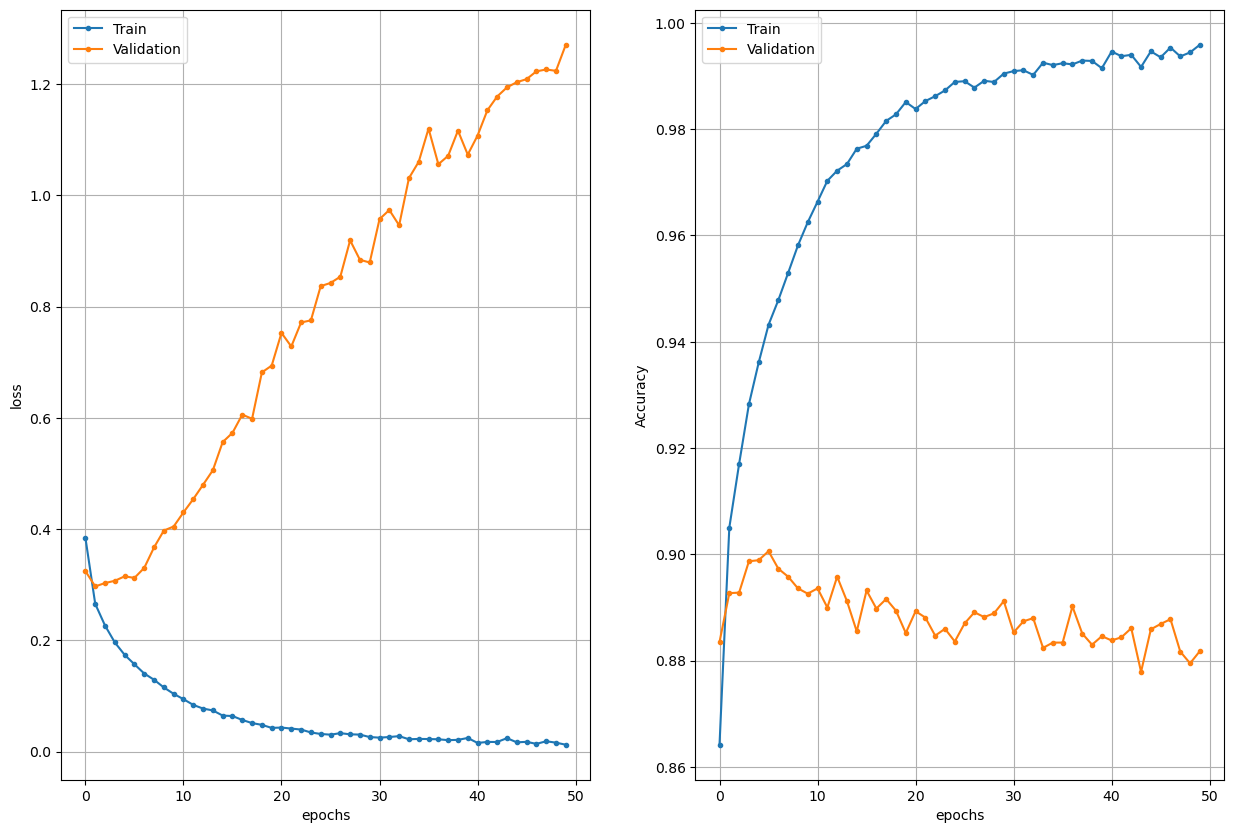

In [31]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [49]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(64, activation="relu")(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_12 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 1,606,666
Trainable params: 1,606,666
Non-trainable params: 0
_________________________________________________

In [50]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 53s 57ms/step - loss: 0.7745 - accuracy: 0.7326 - val_loss: 0.3560 - val_accuracy: 0.8710
Epoch 2/50
938/938 [==============================] - 52s 56ms/step - loss: 0.4178 - accuracy: 0.8531 - val_loss: 0.3163 - val_accuracy: 0.8824
Epoch 3/50
938/938 [==============================] - 53s 56ms/step - loss: 0.3575 - accuracy: 0.8734 - val_loss: 0.3031 - val_accuracy: 0.8872
Epoch 4/50
938/938 [==============================] - 52s 56ms/step - loss: 0.3189 - accuracy: 0.8849 - val_loss: 0.2915 - val_accuracy: 0.8950
Epoch 5/50
938/938 [==============================] - 52s 56ms/step - loss: 0.3030 - accuracy: 0.8903 - val_loss: 0.2884 - val_accuracy: 0.8968
Epoch 6/50
938/938 [==============================] - 56s 59ms/step - loss: 0.2733 - accuracy: 0.8995 - val_loss: 0.2821 - val_accuracy: 0.8994
Epoch 7/50
938/938 [==============================] - 54s 57ms/step - loss: 0.2625 - accuracy: 0.9023 - val_loss: 0.2762 - val_accuracy:

Train Acc      0.969083309173584
Validation Acc 0.9128000140190125


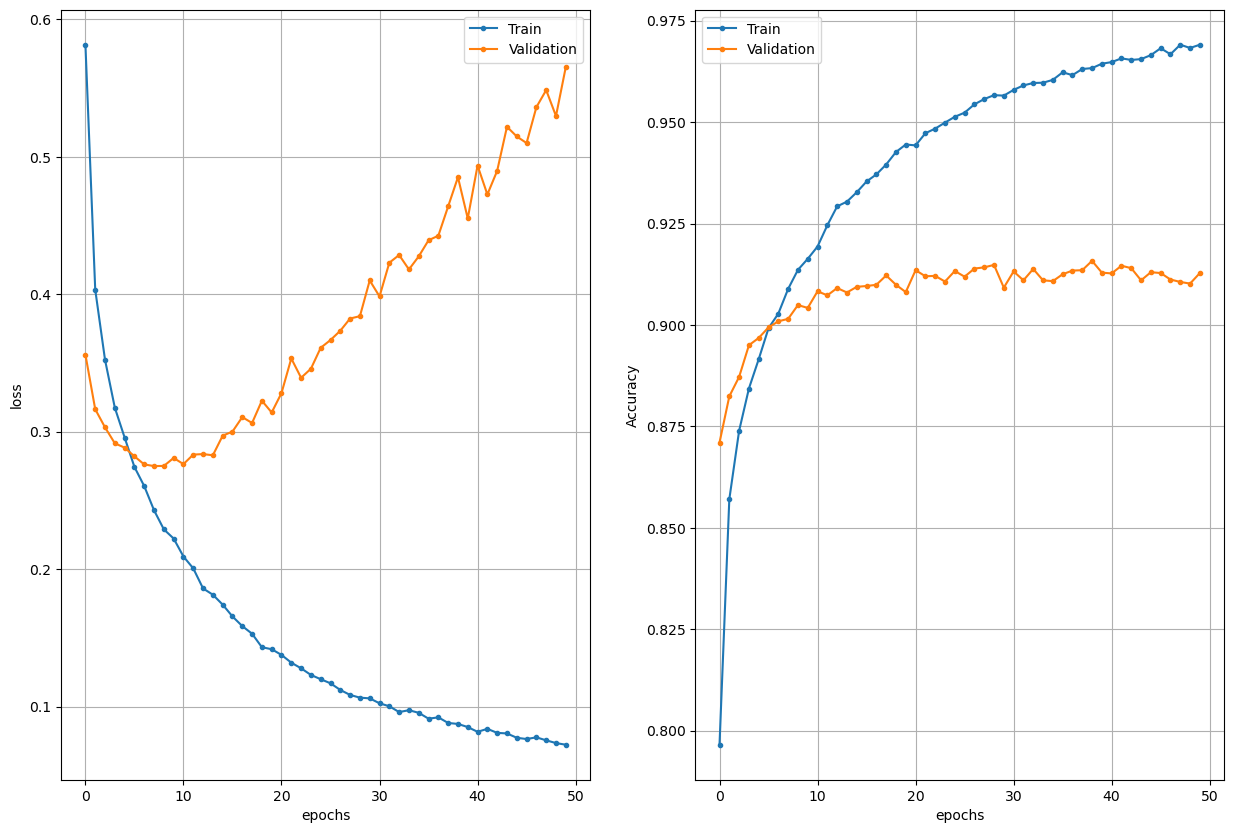

In [51]:
# Show the results

def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

### Questions

* What have you done in order to improve the performance?


        добавил Dropout и стало лучше) validation accuracy 0.91
    
* Have you tried configurations that did not work out?


        добалял еще слои Conv2D и менял значения filters.
        Еще один слой Dense пробовал.
    